<a href="https://colab.research.google.com/github/niladribanerjee80/DSA-Class/blob/main/DLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import graphviz

class Node:
    def __init__(self,value):
        self.value = value
        self.next = None
        self.prev = None

class DoubleLinkedList:
    def __init__(self,value):
        new_node = Node(value)
        self.head = new_node
        self.tail = new_node
        self.length = 1

    def print_list(self,msg="Print DLL"):
        print("--------")
        print(msg)
        print("--------")
        if self.length == 0:
            return "Nothing to display"
        temp = self.head
        next_list = []
        prev_list = []
        while temp is not None:
            next_list.append(temp.value)
            if temp.prev:
                prev_list.append(temp.prev.value)
            temp = temp.next
        if next_list[:-1] == prev_list:
            result = ""
            for index,item in enumerate(next_list):
                if index == 0:
                    result = str(item)
                else:
                    result = result + "<->" + str(item)
            print(result)
        else:
            print("DLL is not formed correctly")

    def print_graph(self,msg="Graph DLL"):
        print("--------")
        print(msg)
        print("--------")
        dot = graphviz.Digraph()
        dot.attr(rankdir="LR")
        temp = self.head
        index = 0
        while temp is not None:
            label = f"{temp.value} (index={index})"
            if self.length == 1:
                dot.node(str(temp.value),label,fillcolor="chartreuse",style="filled")
            else:
                if temp == self.head:
                    dot.node(str(temp.value),label,fillcolor="aquamarine",style="filled")
                elif temp == self.tail:
                    dot.node(str(temp.value),label,fillcolor="cyan",style="filled")
                else:
                    dot.node(str(temp.value),label)
            if temp.next:
                dot.edge(str(temp.value),str(temp.next.value))
            if temp.prev:
                dot.edge(str(temp.value),str(temp.prev.value))
            temp = temp.next
            index += 1
        dot.edge("Start", str(self.head.value),dir="back")
        dot.edge(str(self.tail.value), "End")
        return dot

    def append(self,value):
        new_node = Node(value)
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1
        return True

    def pop(self):
        if self.length == 0:
            return None
        popped_node = self.tail
        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            self.tail = self.tail.prev
            self.tail.next = None
        popped_node.prev = None
        self.length -= 1
        return popped_node

    def make_empty(self):
        self.head = None
        self.tail = None
        self.length = 0

    def prepend(self,value):
        new_node = Node(value)
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.next = self.head
            self.head.prev = new_node
            self.head = new_node
        self.length += 1
        return True

    def pop_first(self):
        if self.length == 0:
            return None
        popped_node = self.head
        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            self.head = self.head.next
            self.head.prev = None
        popped_node.next = None
        self.length -= 1
        return popped_node

--------
Graph DLL
--------


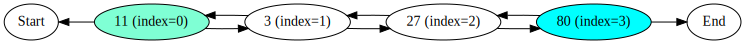

In [4]:
dll = DoubleLinkedList(11)
dll.append(3)
dll.append(27)
dll.append(80)
dll.print_graph()

--------
Graph DLL
--------


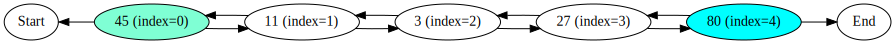

In [5]:
dll.prepend(45)
dll.print_graph()

Pop First Node =  45
--------
Graph DLL
--------


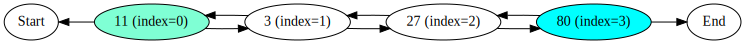

In [7]:
pop_first_node = dll.pop_first()
print("Pop First Node = ",pop_first_node.value)
dll.print_graph()

Pop Node =  80
--------
Graph DLL
--------


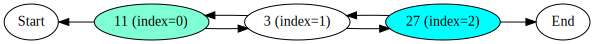

In [8]:
pop_node = dll.pop()
print("Pop Node = ",pop_node.value)
dll.print_graph()